In [1]:
import numpy as np
import h5py
import pandas
import os
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
from utils.Surf import roi2gii, vertex2gii
from utils.Vis import plot_maps

In [2]:
# Config parameters
root = "/home/ali/graham-akhanf/EpLink/Eplink"
results_path = os.path.join(root,"ISC-pipeline","results","{dataset}","looISC","control")

atlases = ['none', 'Glasser_2016', 'Desikan', 'Schaefer2018_17Networks_400', 'Yan2023_17Networks_400']
atlases_aliases = ['Vertex', 'Glasser 2016', 'Desikan', 'Schaefer 2018', 'Yan 2023']

datasets = ["eplink-p2", "eplink-p3"]
task_dataset = {'eplink-p2': 'hitchcock', 'eplink-p3': 'movie'}
resampled_dataset = {'eplink-p2': 'N', 'eplink-p3': 'Y'}

fwhm = 0
confounds_idx = 1

file_pattern = "looISC_task-{task}_hemi-{{hemi}}_fwhm-{fwhm}_confounds-{confounds_idx}_resampled-{resampled}_atlas-{atlas}.h5"

# generate leave-one-out surface maps

In [3]:
def load_data_loo(file_format):
    data = dict()
    for h in ['L', 'R']:
        fpath = file_format.format(hemi=h)
        with h5py.File(fpath, 'r') as f:
                # Load the pairwise ISCs
                data[h] = f['loo_ISC'][:]
    return data

In [7]:
for dataset in datasets:
    task = task_dataset[dataset]
    for i, atlas in enumerate(atlases):
        file_format = os.path.join(results_path, file_pattern).format(dataset=dataset, task=task, fwhm=fwhm, confounds_idx=confounds_idx, resampled = 'N', atlas=atlas)
        ISC = load_data_loo(file_format)

        ISC_mean = {k: v.mean(axis=0) for k,v in ISC.items()}

        output_path = os.path.join('.','surface_maps',f'{dataset}')
        if atlas == 'none':
            vertex2gii(ISC_mean, output_path, f'looISC_desc-mean_fwhm-{fwhm}_confounds-{confounds_idx}_atlas-{atlas}')
        else:
            atlasfile = os.path.join('.','ISC-pipeline','resources','atlases_fsLR_32K',f'{atlas}.32k.{{hemi}}.label.gii')
            roi2gii(ISC_mean, atlasfile, output_path, f'looISC_desc-mean_fwhm-{fwhm}_confounds-{confounds_idx}_atlas-{atlas}')

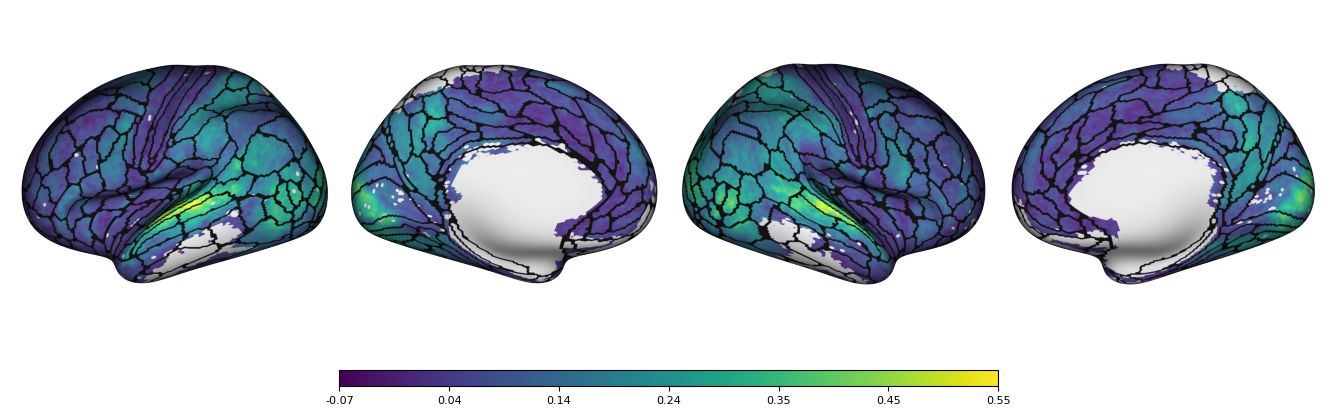

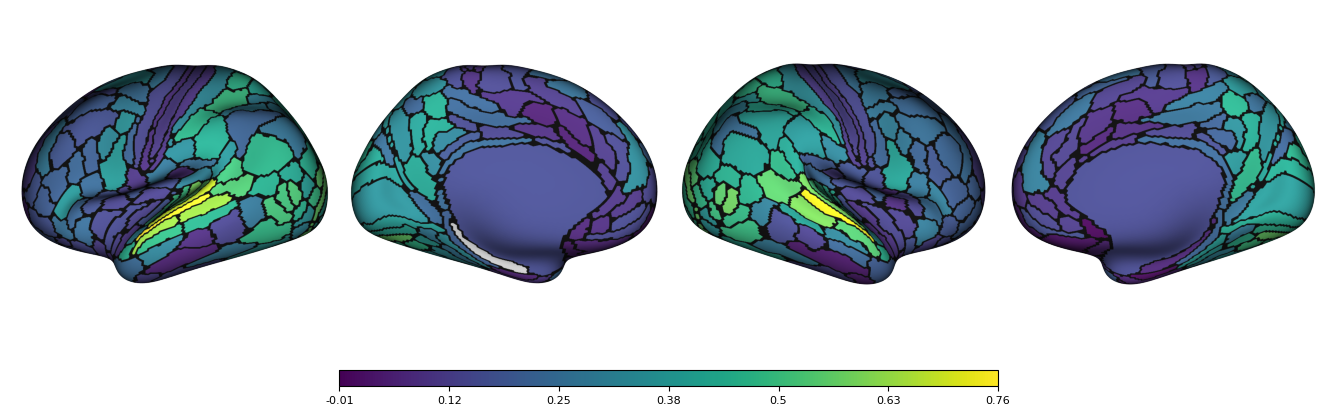

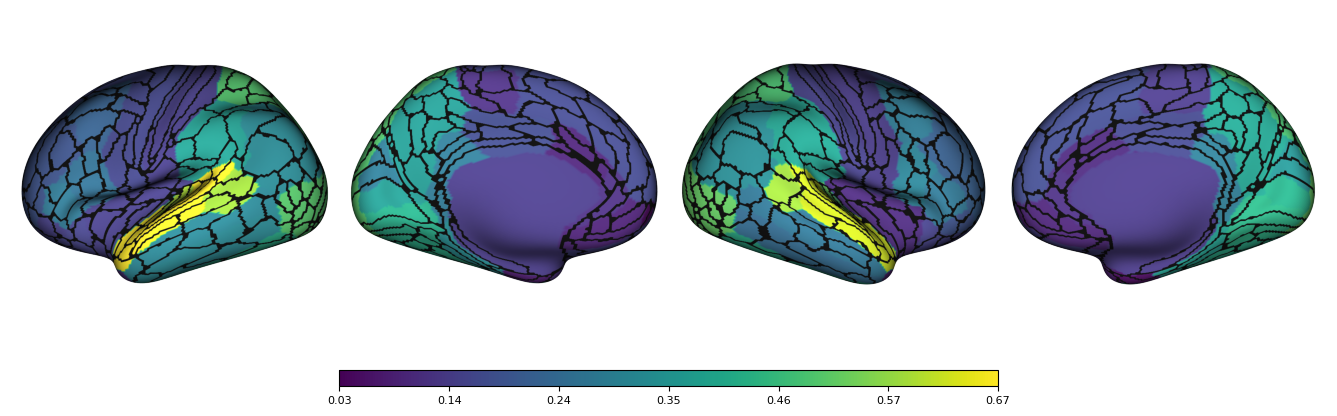

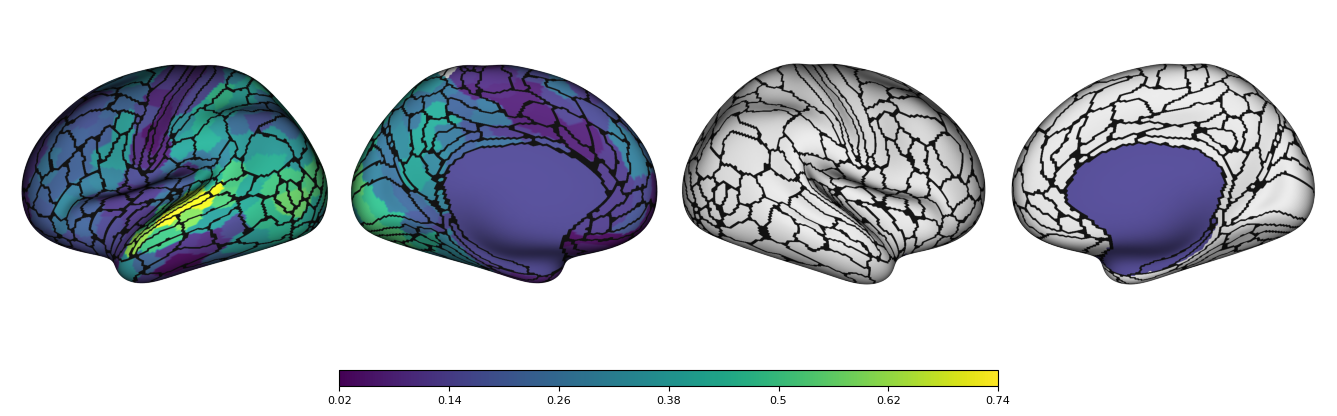

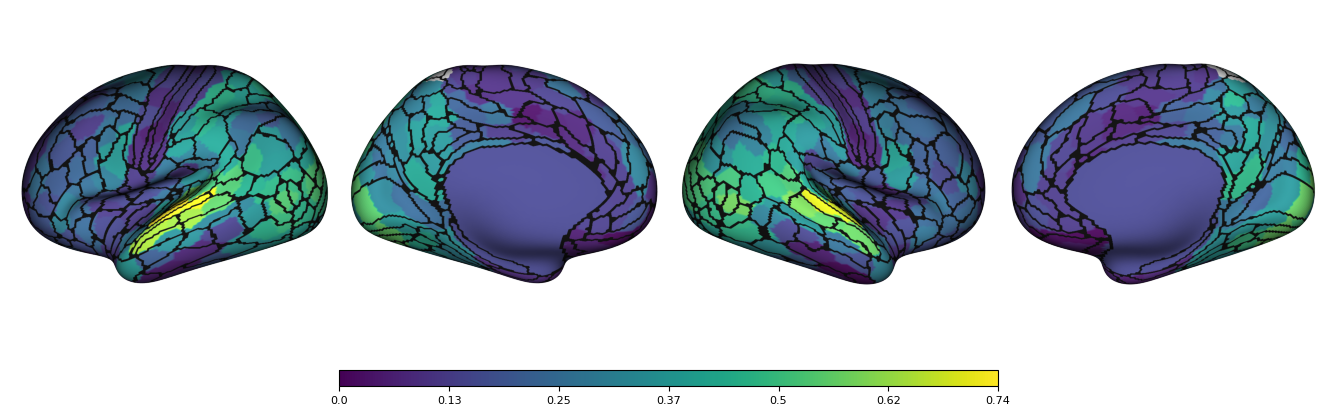

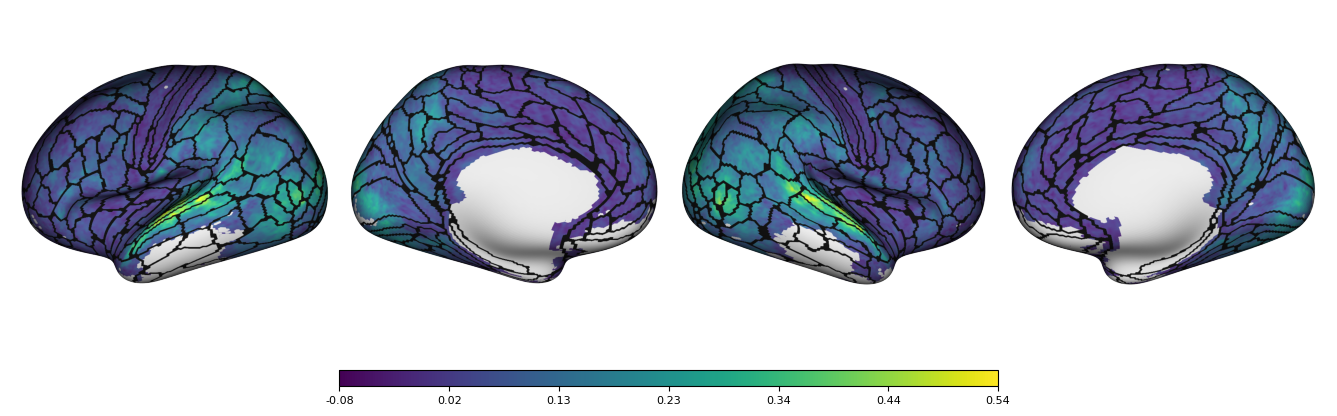

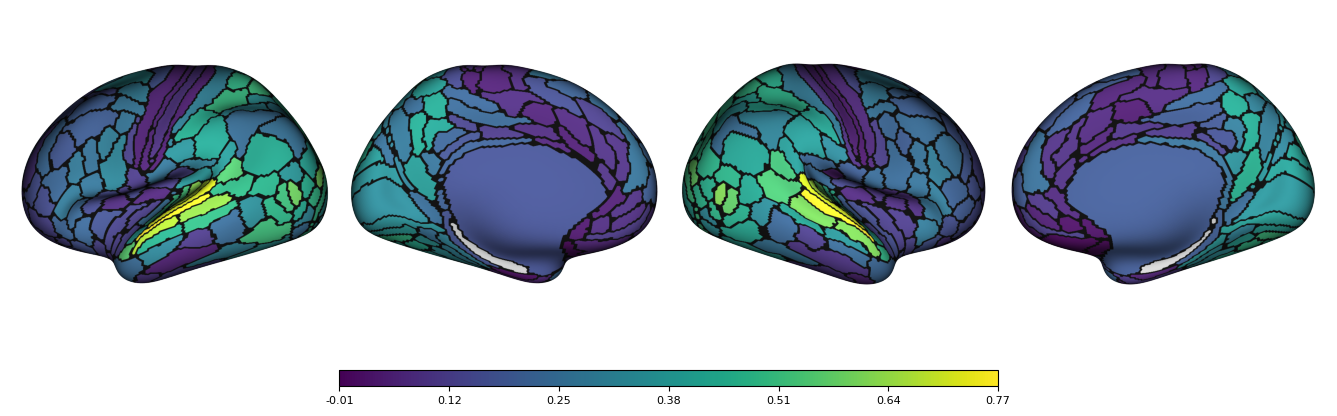

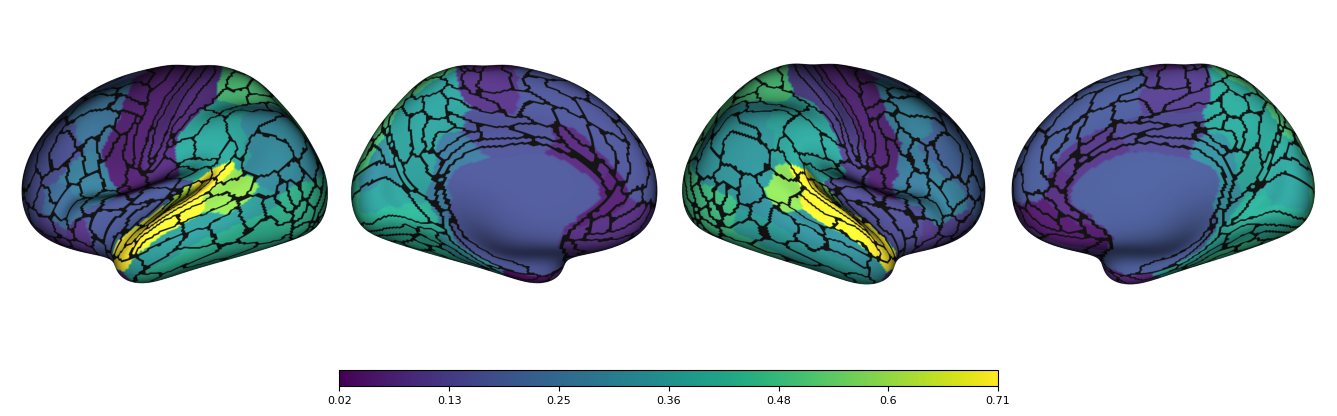

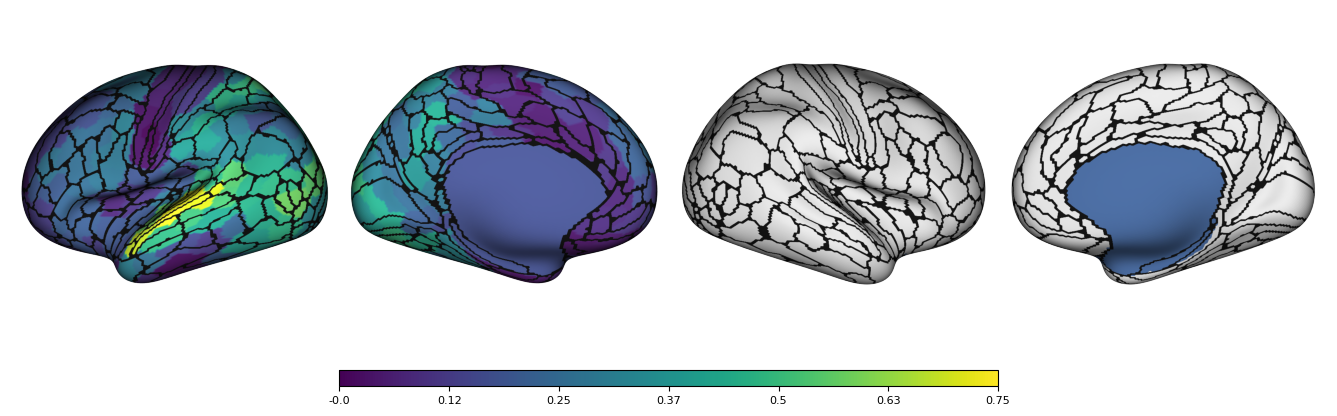

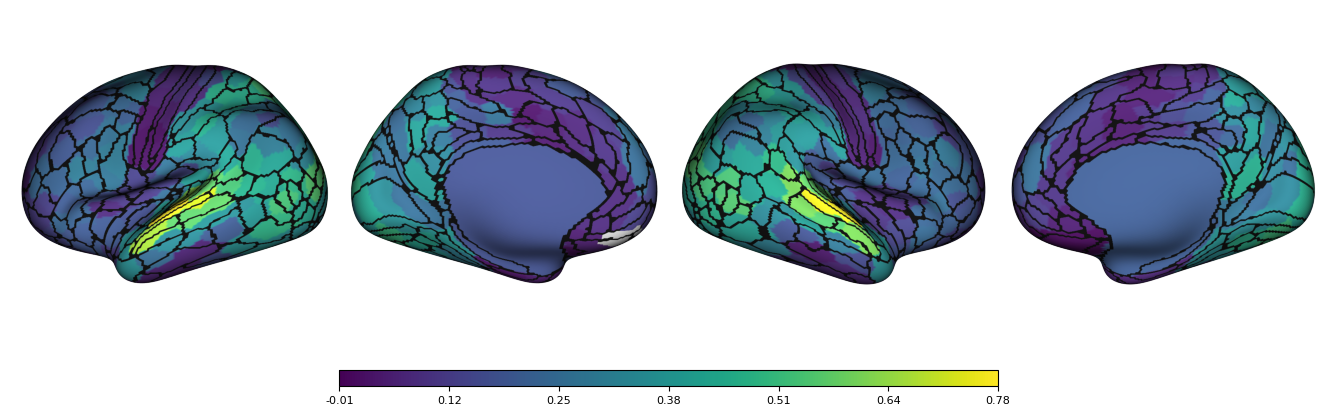

In [9]:
for dataset in datasets:
    for i, atlas in enumerate(atlases):
        atlasfile = os.path.join('.','ISC-pipeline','resources','atlases_fsLR_32K',f'{atlas}.32k.{{hemi}}.label.gii')
        map_path = os.path.join('.','surface_maps',f'{dataset}',f'looISC_desc-mean_fwhm-{fwhm}_confounds-{confounds_idx}_atlas-{atlas}_{{hemi}}.shape.gii')
        plot_maps(map_path, atlas=atlasfile)
        